# Loan Application Status Prediction :
    
Project Description:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, 
loan amount, their income, dependents etc. 


Independent Variables:
    
1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis
of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or 
university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an 
employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application 
process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying
them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis 
of the details provided in the dataset. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Dimension of Dataset ...

df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

About columns :
    
Loan_ID - Applicant Unique Loan ID

Gender - Applicant(Male and Female)

Married - Applicant married or not

Dependent - Applicant has any dependents or not

Education - It will tell us whether the applicant is Graduated or not.

Self_Employed - This defines that the applicant is self-employed i.e. Yes/ No

Applicant Income - 	Applicant income

Coapplicant Income - Co-applicant income

Loan Amount - Loan amount (in thousands or Lakhs)

Loan Amount Term - Terms of loan (in months)

Credit History - Credit history of individual’s repayment of their debts

Property Area - Area of property i.e. Rural/Urban/Semi-urban 

Loan Status - Status of Loan Approved or not i.e. Y- Yes, N-No 

In [6]:
# Check the Nan Value :

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We found Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History columns are showing
the missing value .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# using fillna method for replace null values with mean for continous(float) columns....

df.fillna(df.mean(), inplace = True)

In [9]:
# using fillna method for replace null values with mode for categorical(Object) columns....

mode_values = {'Gender' : df['Gender'].mode()[0], 'Married' : df['Married'].mode()[0],
              'Dependents' : df['Dependents'].mode()[0], 'Self_Employed' : df['Self_Employed'].mode()[0]}            

In [10]:
df.fillna(value = mode_values, inplace = True)

In [11]:
# Drop the columns of Loan_ID in my Dataset ...

df.drop(['Loan_ID'], inplace = True, axis = 1)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

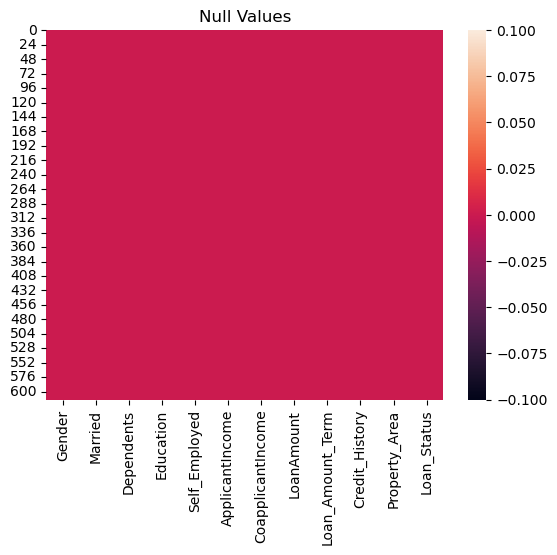

In [14]:
# using Heatmap :

sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

EDA : Expolatory Data Analysis and Visualization :

In [15]:
df.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


In [16]:
# Symetrical Data using continous column (float)...

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


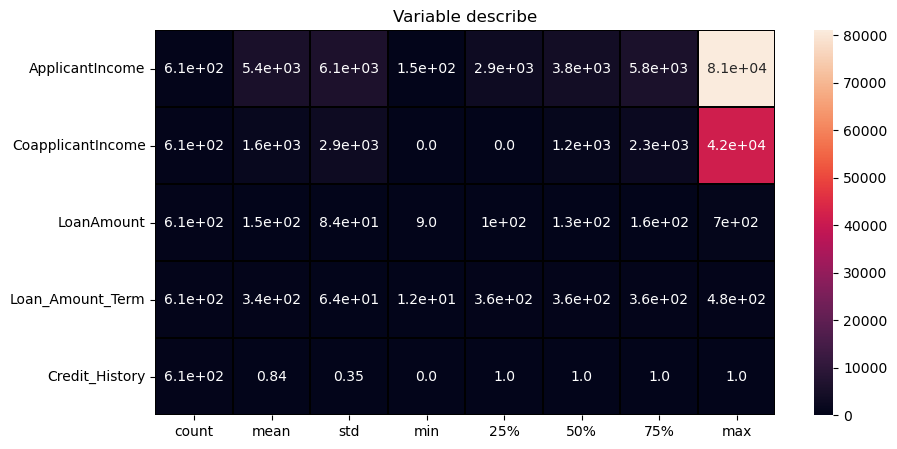

In [17]:
# using heatmap :

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.heatmap(df.describe().T, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2')
plt.title('Variable describe')
plt.show()

Data Visualization :

In [18]:
df_visualization_nominal = df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome', 
                               'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
                               'Loan_Status'].copy()]

In [19]:
df_visualization_nominal.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Male      502
Female    112
Name: Gender, dtype: int64


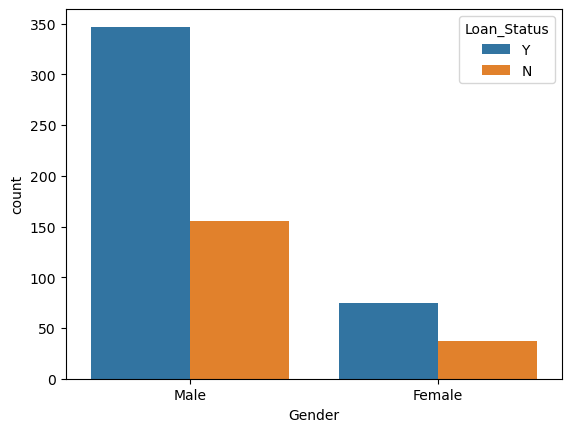

In [20]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df_visualization_nominal)
print(df_visualization_nominal['Gender'].value_counts())

We observe 352 male applicant the loan is approved and 150 male applicant loan is not approve
and 70 Female applicant Loan is approved and 50 Female applicant Loan is not approved.

Yes    401
No     213
Name: Married, dtype: int64


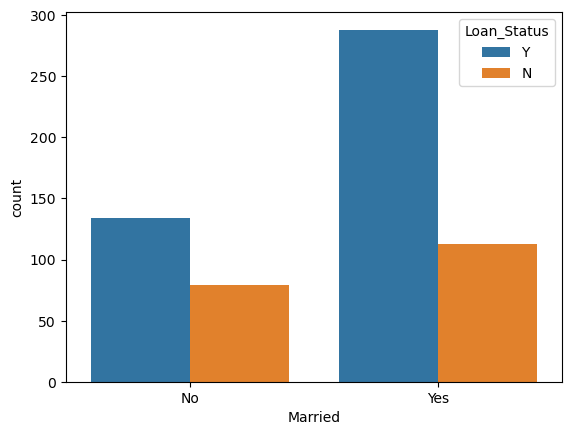

In [21]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df_visualization_nominal)
print(df_visualization_nominal['Married']. value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


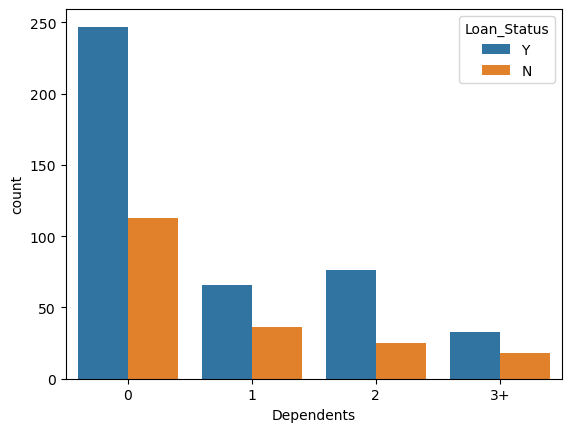

In [22]:
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df_visualization_nominal)
print(df_visualization_nominal['Dependents']. value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


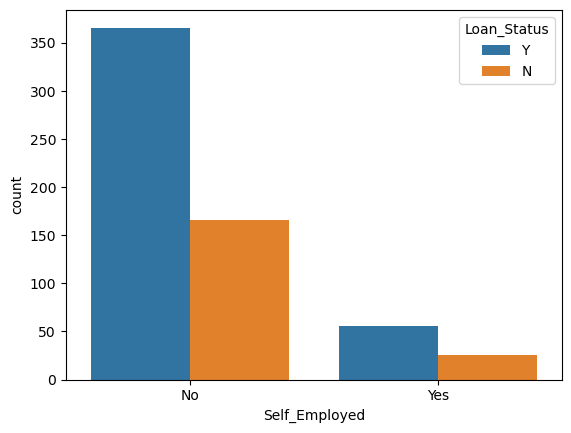

In [23]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = df_visualization_nominal)
print(df_visualization_nominal['Self_Employed']. value_counts())

In [24]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

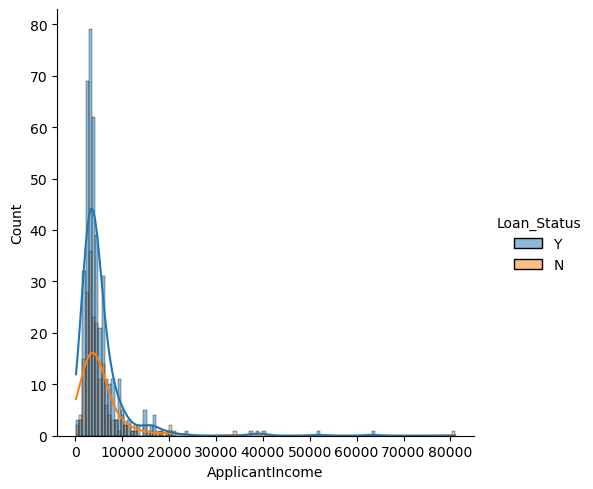

In [25]:
# Distribution Plot :

sns.displot(x = 'ApplicantIncome', hue = 'Loan_Status', data = df_visualization_nominal, kde = True)

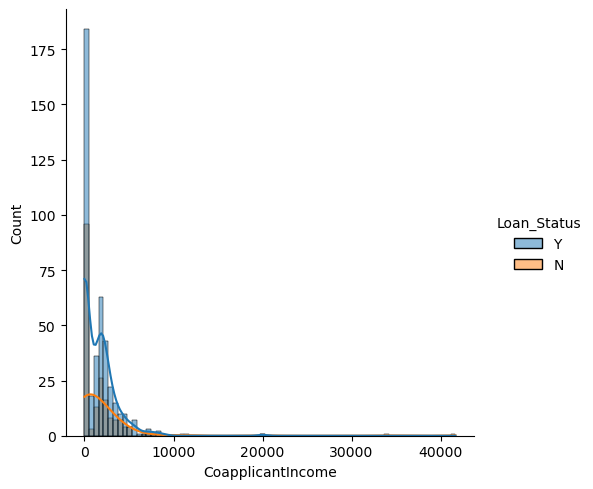

In [26]:
sns.displot(x = 'CoapplicantIncome', hue = 'Loan_Status', data = df_visualization_nominal, kde = True)

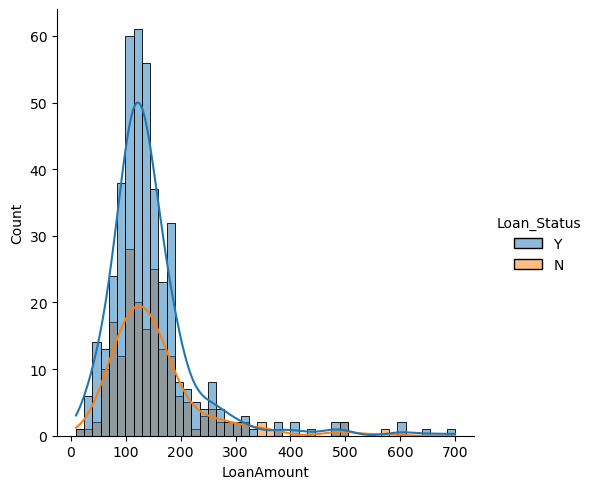

In [27]:
sns.displot(x = 'LoanAmount', hue = 'Loan_Status', data = df_visualization_nominal, kde = True)

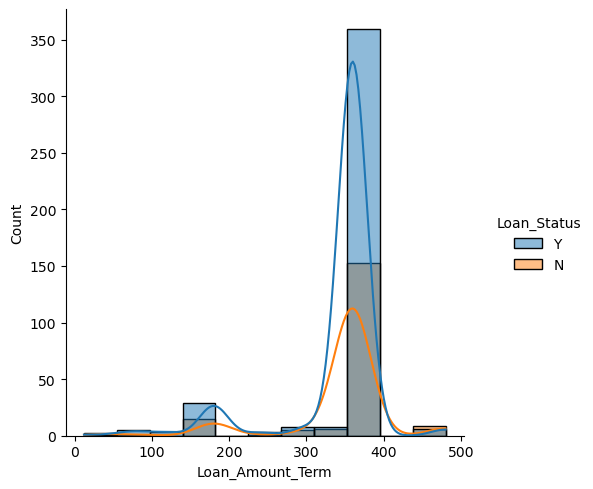

In [28]:
sns.displot(x = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_visualization_nominal, kde = True)

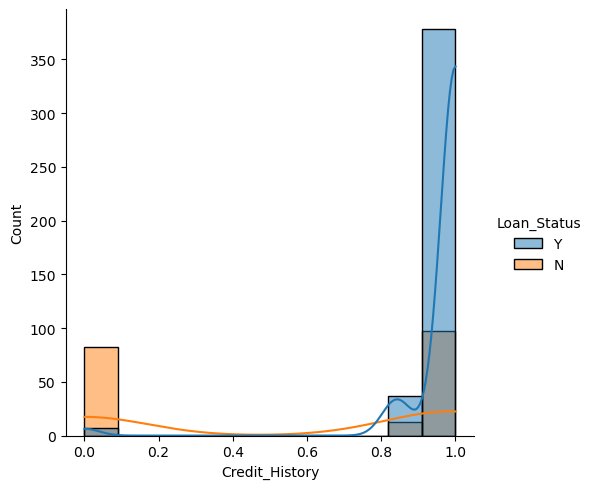

In [29]:
sns.displot(x = 'Credit_History', hue = 'Loan_Status', data = df_visualization_nominal, kde = True)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


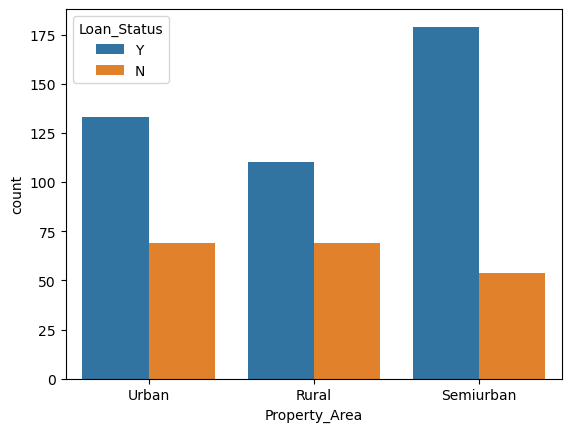

In [30]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = df_visualization_nominal)
print(df_visualization_nominal['Property_Area']. value_counts())

In [31]:
df_visualization_ordinal = df[['Education', 'Loan_Status'].copy()]

In [32]:
df_visualization_ordinal.columns

Index(['Education', 'Loan_Status'], dtype='object')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


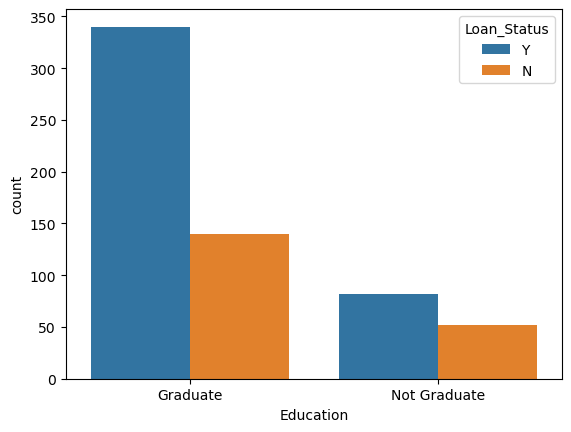

In [33]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df_visualization_ordinal)
print(df_visualization_ordinal['Education'].value_counts())

In [34]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

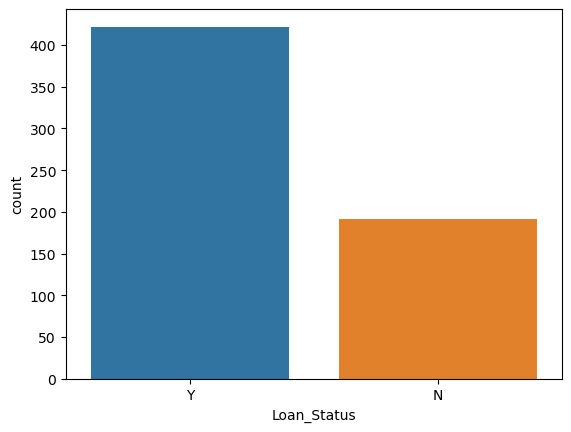

In [35]:
sns.countplot(df['Loan_Status'])

In [36]:
# correlation using continous variable :

df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


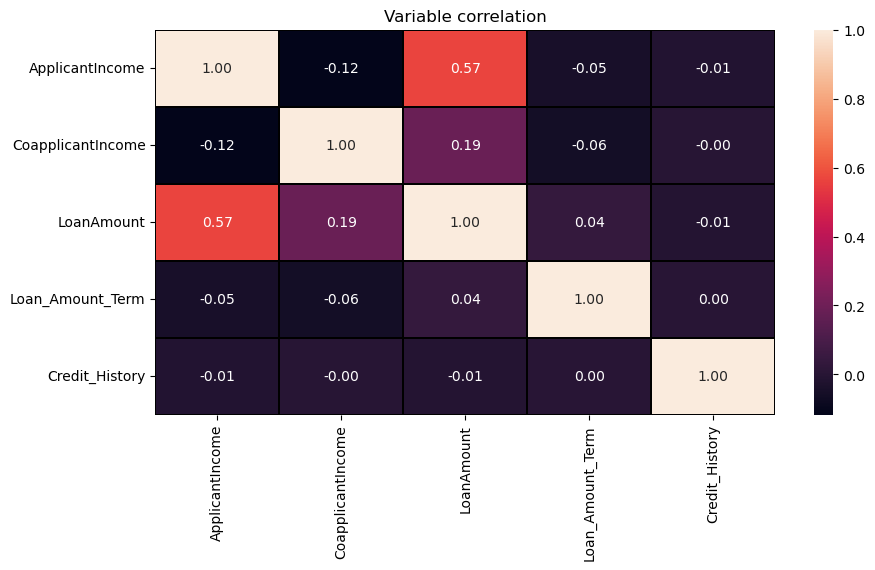

In [37]:
# using Heatmap :

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Variable correlation')
plt.show()

In [38]:
# Label Encoding for covert categorical to numerical :

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [40]:
# Checking Skewness..

df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [41]:
# Preprocessing :
# Seprating the independent variable and dependent variable(target) in x and y before removing the skewness :

x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [42]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [43]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [44]:
len(x)

614

In [45]:
len(y)

614

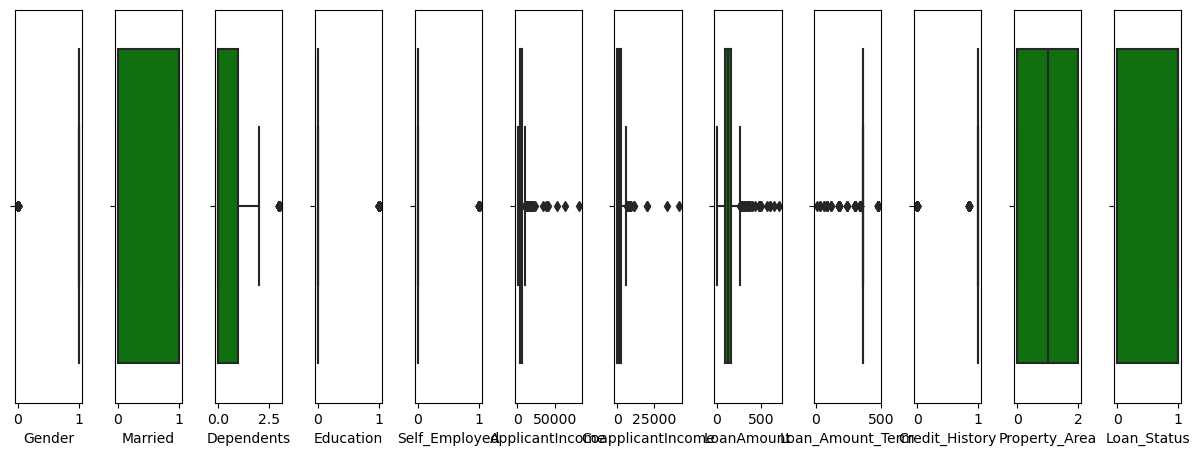

In [46]:
# Checking Outlier :

collist = df.columns.values
ncol = 30
nrows = 20
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.boxplot(df[collist[i]], color = 'green', orient = 'v')
    plt.tight_layout()

In [47]:
# Firstly , Start for removing Skewnes process ....
# Checking Skewness with sort_values ....

x.skew().sort_values(ascending = False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -1.963600
Loan_Amount_Term    -2.389680
dtype: float64

In [48]:
# We can see most of columns skewed so we will use the powertransform method for removing the skewness ...

from sklearn.preprocessing import power_transform, PowerTransformer

pt = PowerTransformer()
x_new_pt = pt.fit_transform(x)
x_new_pt

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

In [49]:
# Numpy array :

x_new = power_transform(x)
x_new

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

In [50]:
# transform II(x)
# transform III(X)

# checking skewness :

pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.389827
LoanAmount           0.024376
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Credit_History      -1.599912
Gender              -1.648795
dtype: float64

In [51]:
# Secondly , We will starting for remove the outlier process :
# using the zscore method for remove the outlier :

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
thresholds = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


The range of -3 to +3 data consider > 3 showing the ouliers value of dataset.

In [52]:
x = x[(z<3).all(axis = 1)]

In [53]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [54]:
df.shape

(614, 12)

In [55]:
x.shape

(577, 11)

In [56]:
# Percentage Data loss :

loss_percent = ((614 - 505)/614) *100
print(loss_percent)

17.75244299674267


In [57]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [58]:
# Use the resample Techniques to handled the imbalanced data ...
# firstly, install the imblearn liberies ...

!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [59]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [577, 614]